In [1]:
### Installing the required packages if not already installed
packages = ['numpy', 'pandas', 'warnings', 'sqlite3', 'sqlite3', 'matplotlib', 'seaborn']

for package in packages:
    try:
        __import__(package)
    except ImportError:
        %pip install {package}

import numpy as np                  # For numerical computing
import pandas as pd                 # For data manipulation
import sqlite3                      # For connecting to SQL database
import matplotlib.pyplot as plt     # For plotting graphs
import seaborn as sns               # For plotting
import os

### Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Setting working directory
os.chdir('/Users/emilwilliamhansen/Desktop/Master-Thesis/Code')

In [2]:
### Extracting the data from the database
conn = sqlite3.connect('Data/data.db')

### Reading the data from the database
unfiltered_stock_ret_d = pd.read_sql('SELECT * FROM daily_returns', conn).set_index('Date').loc['1983':'2024']
unfiltered_stock_ret_m = pd.read_sql('SELECT * FROM monthly_returns', conn).set_index('Date').loc['1983':'2024']
stock_ret_d = pd.read_sql('SELECT * FROM filtered_daily_returns', conn).set_index('Date').loc['1983':'2024']
stock_ret_m = pd.read_sql('SELECT * FROM filtered_monthly_returns', conn).set_index('Date').loc['1983':'2024']
factor_ret_d = pd.read_sql('SELECT * FROM factors_daily', conn).set_index('Date').loc['1983':'2024']
factor_ret_m = pd.read_sql('SELECT * FROM factors_monthly', conn).set_index('Date').loc['1983':'2024']

### Closing the connection
conn.close()

### Making sure the index is a datetime object
unfiltered_stock_ret_d.index = pd.to_datetime(unfiltered_stock_ret_d.index)
unfiltered_stock_ret_m.index = pd.to_datetime(unfiltered_stock_ret_m.index)
stock_ret_d.index = pd.to_datetime(stock_ret_d.index)
stock_ret_m.index = pd.to_datetime(stock_ret_m.index)
factor_ret_d.index = pd.to_datetime(factor_ret_d.index)
factor_ret_m.index = pd.to_datetime(factor_ret_m.index)

#### Sumerizing data in table

In [3]:
table2 = pd.DataFrame(index = ['Stocks', 'Stocks (F)', 'RF', 'MKT', 'SMB', 'HML', 'UMD', 'BAB'],
                      columns = ['Frequency', 'Period', 'N', 'Mean', 'Volatility', 'Max', 'Min'])

table2['Frequency'] = ['D & M', 'D & M', 'D & M', 'D & M', 'D & M', 'D & M', 'D & M', 'D & M']
table2['Period'] = ['1980:01-2023:12', '1980:01-2023:12', '1980:01-2023:12', '1980:01-2023:12', '1981:02-2023:12', '1981:07-2023:12', '1981:07-2023:12', '1983:01-2023:12']
table2['N'] = [len(unfiltered_stock_ret_m.columns), len(stock_ret_m.columns),
               f"{len(factor_ret_d['rf'].dropna())} & {len(factor_ret_m['rf'].dropna())}",
               f"{len(factor_ret_d['MKT'].dropna())} & {len(factor_ret_m['MKT'].dropna())}",
                f"{len(factor_ret_d['SMB'].dropna())} & {len(factor_ret_m['SMB'].dropna())}",
                f"{len(factor_ret_d['HML'].dropna())} & {len(factor_ret_m['HML'].dropna())}",
                f"{len(factor_ret_d['UMD'].dropna())} & {len(factor_ret_m['UMD'].dropna())}",
                f"{len(factor_ret_d['BAB'].dropna())} & {len(factor_ret_m['BAB'].dropna())}"]

table2['Mean'] = [f"{unfiltered_stock_ret_m.mean().mean()*12:.2%}", f"{stock_ret_m.mean().mean()*12:.2%}",
                  f"{factor_ret_m['rf'].mean()*12:.2%}", f"{factor_ret_m['MKT'].mean()*12:.2%}",
                    f"{factor_ret_m['SMB'].mean()*12:.2%}", f"{factor_ret_m['HML'].mean()*12:.2%}", 
                    f"{factor_ret_m['UMD'].mean()*12:.2%}", f"{factor_ret_m['BAB'].mean()*12:.2%}"]

table2['Volatility'] = [f"{unfiltered_stock_ret_m.mean().std()*np.sqrt(12):.2%}", f"{stock_ret_m.mean().std()*np.sqrt(12):.2%}",
                        f"{factor_ret_m['rf'].std()*np.sqrt(12):.2%}", f"{factor_ret_m['MKT'].std()*np.sqrt(12):.2%}", 
                        f"{factor_ret_m['SMB'].std()*np.sqrt(12):.2%}", f"{factor_ret_m['HML'].std()*np.sqrt(12):.2%}", 
                        f"{factor_ret_m['UMD'].std()*np.sqrt(12):.2%}",f"{factor_ret_m['BAB'].std()*np.sqrt(12):.2%}"]
                  
table2['Min'] = [f"{unfiltered_stock_ret_m.min().min():.0%}", f"{stock_ret_m.min().min():.0%}",
                    f"{factor_ret_m['rf'].min():.2%}", f"{factor_ret_m['MKT'].min():.2%}", 
                    f"{factor_ret_m['SMB'].min():.2%}", f"{factor_ret_m['HML'].min():.2%}", 
                    f"{factor_ret_m['UMD'].min():.2%}", f"{factor_ret_m['BAB'].min():.2%}"]

table2['Max'] = [f"{unfiltered_stock_ret_m.max().max():.0%}", f"{stock_ret_m.max().max():.0%}",
                    f"{factor_ret_m['rf'].max():.2%}", f"{factor_ret_m['MKT'].max():.2%}", 
                    f"{factor_ret_m['SMB'].max():.2%}", f"{factor_ret_m['HML'].max():.2%}", 
                    f"{factor_ret_m['UMD'].max():.2%}", f"{factor_ret_m['BAB'].max():.2%}"]

table2.to_latex('Tables/1-data_summary.tex', index=True, float_format='%.3f', escape=False, multirow=True, multicolumn=True)
table2

,Frequency,Period,N,Mean,Volatility,Max,Min
Stocks,D & M,1980:01-2023:12,1074,1473.47%,13305.53%,249900%,-100%
Stocks (F),D & M,1980:01-2023:12,995,14.41%,30.02%,11567%,-100%
RF,D & M,1980:01-2023:12,10290 & 492,5.71%,1.33%,2.07%,0.01%
MKT,D & M,1980:01-2023:12,10290 & 492,17.51%,20.80%,19.95%,-25.95%
SMB,D & M,1981:02-2023:12,10290 & 492,15.01%,18.81%,62.52%,-11.95%
HML,D & M,1981:07-2023:12,10290 & 492,8.01%,24.58%,91.54%,-29.09%
UMD,D & M,1981:07-2023:12,10290 & 492,13.40%,21.36%,22.41%,-25.95%
BAB,D & M,1983:01-2023:12,10290 & 492,16.70%,20.78%,37.97%,-22.28%


#### Looking at volatility relationship

In [4]:
### Getting the daily volatilites we are missing using the daily returns
volatility = pd.DataFrame(index=factor_ret_m.index, columns=factor_ret_m.drop(columns='rf').columns)

for factor in factor_ret_m.drop(columns='rf').columns:
    for date in factor_ret_m.index:
        volatility.loc[date, factor] = factor_ret_d.loc[date.strftime('%Y-%m'), factor].std() * np.sqrt(252)

### Categorising the volatility as low, medium, high
terciles = volatility.quantile([1/3, 2/3])

### Getting a new dataframe with the volatility categorised
volatility_cat = pd.DataFrame(index=volatility.index, columns=volatility.columns)
for factor in volatility.columns:
    for date in volatility.index:
        if volatility.loc[date, factor] <= terciles.loc[1/3, factor]:
            volatility_cat.loc[date, factor] = 'Low'
        elif volatility.loc[date, factor] <= terciles.loc[2/3, factor]:
            volatility_cat.loc[date, factor] = 'Medium'
        else:
            volatility_cat.loc[date, factor] = 'High'

### Getting the monthly sharpe ratios
sharpe_ratios = (factor_ret_m.drop(columns='rf') * 12) / volatility

### Restricting the plot_df to the period of our volatility-timed data
sharpe_ratios = sharpe_ratios.loc['1993':]
volatility_cat = volatility_cat.loc['1993':]

### Creating a dataframe to for the plot
plot_df = pd.DataFrame(columns=volatility_cat.columns)
plot_df.loc['low (using factor vol)',] = sharpe_ratios[volatility_cat.shift(1) == 'Low'].mean()
plot_df.loc['medium (using factor vol)',] = sharpe_ratios[volatility_cat.shift(1) == 'Medium'].mean()
plot_df.loc['high (using factor vol)',] = sharpe_ratios[volatility_cat.shift(1) == 'High'].mean()
plot_df.loc['low (using market vol)'] = sharpe_ratios[volatility_cat['MKT'].shift(1) == 'Low'].mean()
plot_df.loc['medium (using market vol)'] = sharpe_ratios[volatility_cat['MKT'].shift(1) == 'Medium'].mean()
plot_df.loc['high (using market vol)'] = sharpe_ratios[volatility_cat['MKT'].shift(1) == 'High'].mean()

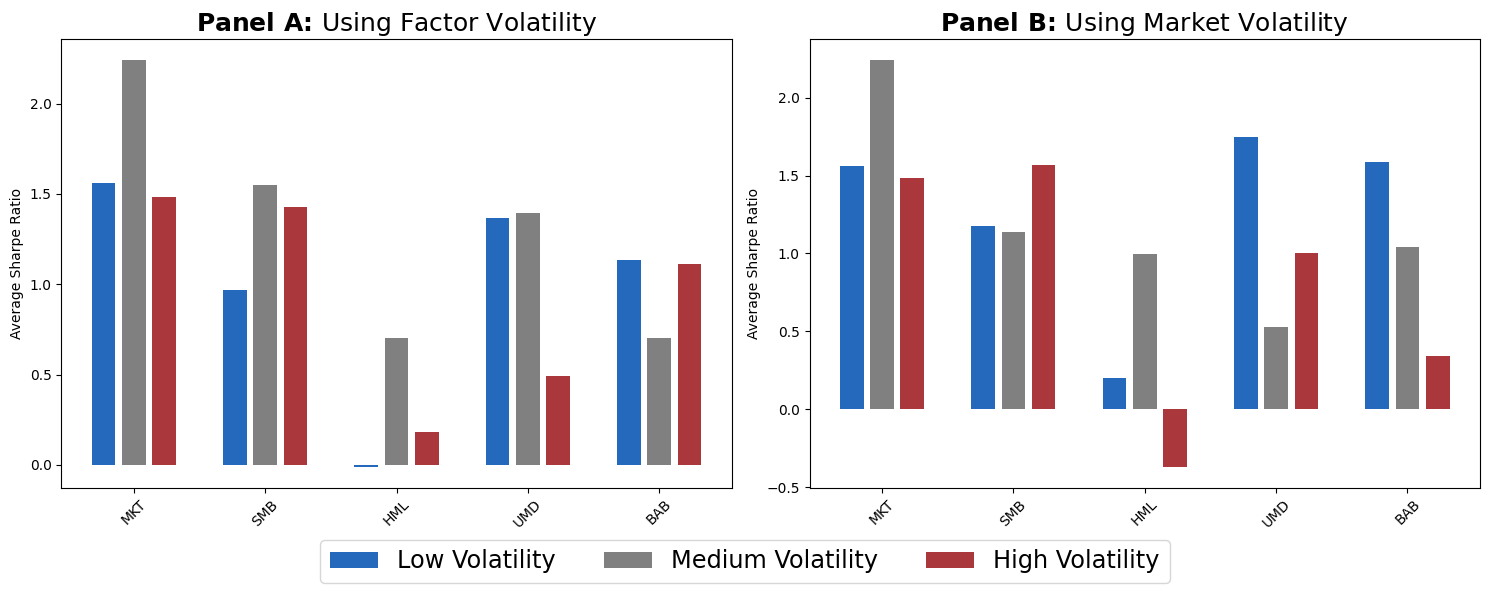

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define bar width and gap
bar_width = 0.18
gap = 0.05
group_width = 3 * bar_width + 2 * gap  # Total width of one group of bars

# Plotting average Sharpe ratios using factor volatility
x = np.arange(len(plot_df.columns))  # X positions for the groups
axes[0].bar(x - group_width / 2 + bar_width / 2, 
            plot_df.loc['low (using factor vol)'], 
            width=bar_width, label='Low Volatility', color='#2469bc')
axes[0].bar(x - group_width / 2 + 3 * bar_width / 2 + gap, 
            plot_df.loc['medium (using factor vol)'], 
            width=bar_width, label='Medium Volatility', color='grey')
axes[0].bar(x - group_width / 2 + 5 * bar_width / 2 + 2 * gap, 
            plot_df.loc['high (using factor vol)'], 
            width=bar_width, label='High Volatility', color='#a9373b')
axes[0].set_title(r'Panel A: $\text{Using Factor Volatility}$', fontsize=18, fontweight='bold')
axes[0].set_ylabel('Average Sharpe Ratio')
axes[0].set_xlabel(' ')
axes[0].set_xticks(x)
axes[0].set_xticklabels(plot_df.columns, rotation=45)

# Plotting average Sharpe ratios using market volatility
axes[1].bar(x - group_width / 2 + bar_width / 2, 
            plot_df.loc['low (using market vol)'], 
            width=bar_width, label='Low Volatility', color='#2469bc')
axes[1].bar(x - group_width / 2 + 3 * bar_width / 2 + gap, 
            plot_df.loc['medium (using market vol)'], 
            width=bar_width, label='Medium Volatility', color='grey')
axes[1].bar(x - group_width / 2 + 5 * bar_width / 2 + 2 * gap, 
            plot_df.loc['high (using market vol)'], 
            width=bar_width, label='High Volatility', color='#a9373b')
axes[1].set_title(r'Panel B: $\text{Using Market Volatility}$', fontsize=18, fontweight='bold')
axes[1].set_ylabel('Average Sharpe Ratio')
axes[1].set_xlabel(' ')
axes[1].set_xticks(x)
axes[1].set_xticklabels(plot_df.columns, rotation=45)

# Adding a single legend for both plots
fig.legend(['Low Volatility', 'Medium Volatility', 'High Volatility'], loc='lower center', ncol=3, fontsize='xx-large', bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Plots/1-avg_risk_ret_during_differrent_vol.png', dpi=300, bbox_inches='tight')
plt.show()

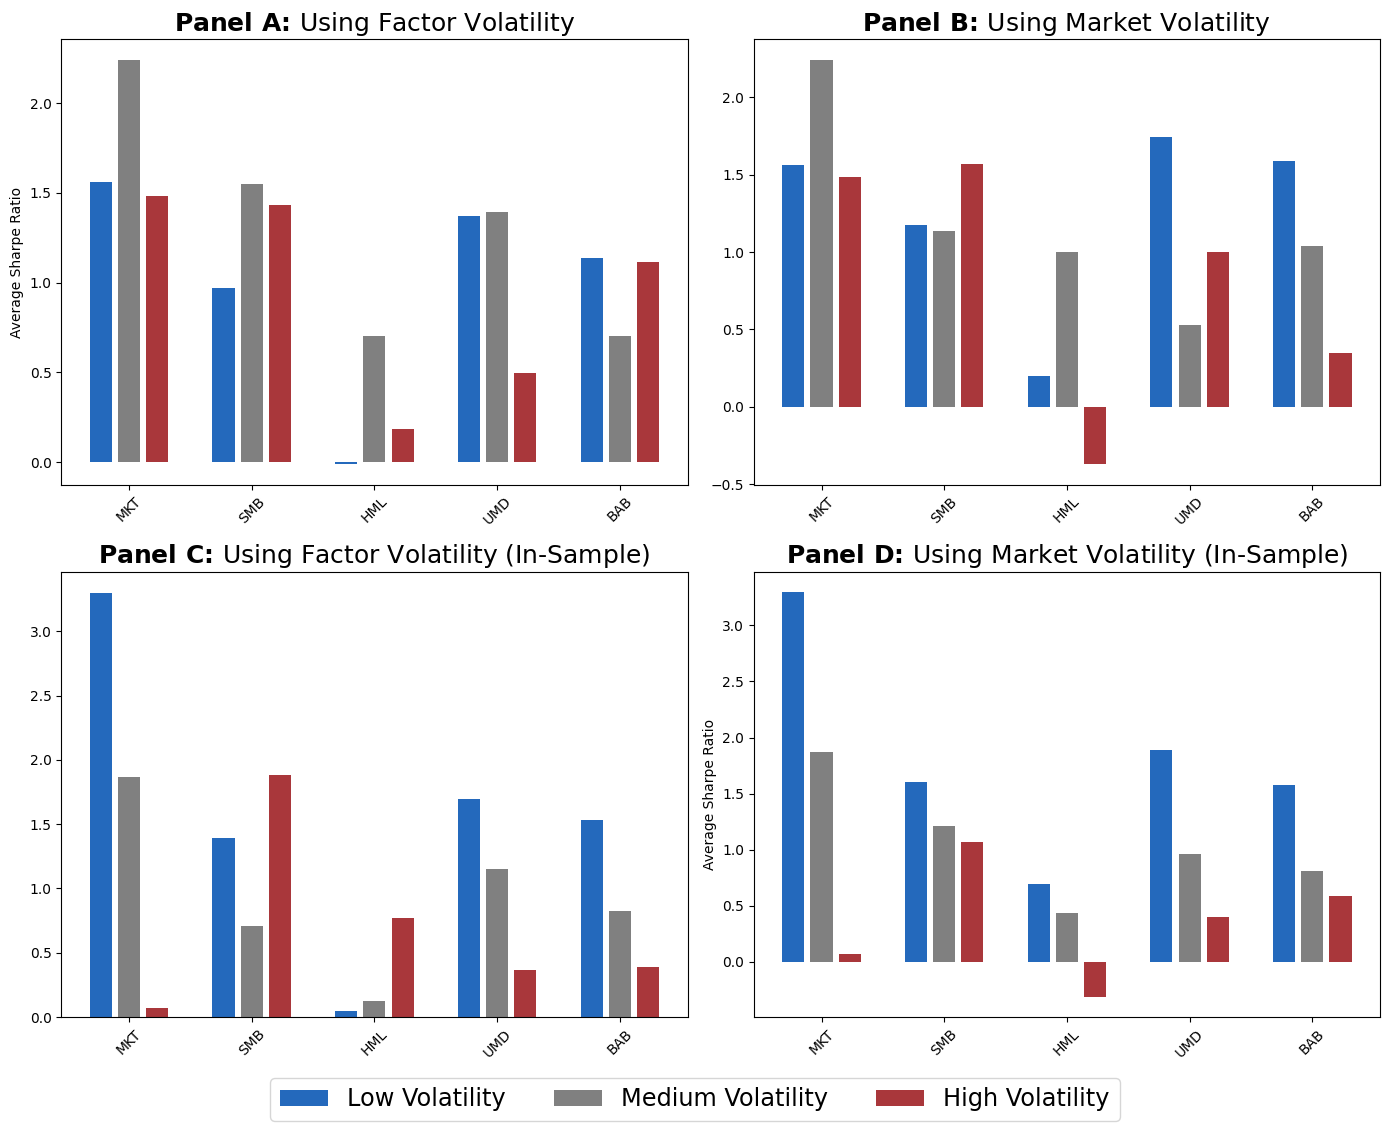

In [6]:
### Creating a dataframe for the plot
plot_df2 = pd.DataFrame(columns=volatility_cat.columns)
plot_df2.loc['low (using factor vol)',] = sharpe_ratios[volatility_cat == 'Low'].mean()
plot_df2.loc['medium (using factor vol)',] = sharpe_ratios[volatility_cat == 'Medium'].mean()
plot_df2.loc['high (using factor vol)',] = sharpe_ratios[volatility_cat == 'High'].mean()
plot_df2.loc['low (using market vol)'] = sharpe_ratios[volatility_cat['MKT'] == 'Low'].mean()
plot_df2.loc['medium (using market vol)'] = sharpe_ratios[volatility_cat['MKT'] == 'Medium'].mean()
plot_df2.loc['high (using market vol)'] = sharpe_ratios[volatility_cat['MKT'] == 'High'].mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Adjusted figsize for better spacing

# Define bar width and gap
bar_width = 0.18
gap = 0.05
group_width = 3 * bar_width + 2 * gap  # Total width of one group of bars

# Plotting average Sharpe ratios using factor volatility
x = np.arange(len(plot_df.columns))  # X positions for the groups
axes[0, 0].bar(x - group_width / 2 + bar_width / 2, 
               plot_df.loc['low (using factor vol)'], 
               width=bar_width, label='Low Volatility', color='#2469bc')
axes[0, 0].bar(x - group_width / 2 + 3 * bar_width / 2 + gap, 
               plot_df.loc['medium (using factor vol)'], 
               width=bar_width, label='Medium Volatility', color='grey')
axes[0, 0].bar(x - group_width / 2 + 5 * bar_width / 2 + 2 * gap, 
               plot_df.loc['high (using factor vol)'], 
               width=bar_width, label='High Volatility', color='#a9373b')
axes[0, 0].set_title(r'Panel A: $\text{Using Factor Volatility}$', fontsize=18, fontweight='bold')
axes[0, 0].set_ylabel('Average Sharpe Ratio')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(plot_df.columns, rotation=45)

# Plotting average Sharpe ratios using market volatility
axes[0, 1].bar(x - group_width / 2 + bar_width / 2, 
               plot_df.loc['low (using market vol)'], 
               width=bar_width, label='Low Volatility', color='#2469bc')
axes[0, 1].bar(x - group_width / 2 + 3 * bar_width / 2 + gap, 
               plot_df.loc['medium (using market vol)'], 
               width=bar_width, label='Medium Volatility', color='grey')
axes[0, 1].bar(x - group_width / 2 + 5 * bar_width / 2 + 2 * gap, 
               plot_df.loc['high (using market vol)'], 
               width=bar_width, label='High Volatility', color='#a9373b')
axes[0, 1].set_title(r'Panel B: $\text{Using Market Volatility}$', fontsize=18, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(plot_df.columns, rotation=45)

# Plotting average Sharpe ratios using factor volatility (In-Sample)
axes[1, 0].bar(x - group_width / 2 + bar_width / 2, 
               plot_df2.loc['low (using factor vol)'], 
               width=bar_width, label='Low Volatility', color='#2469bc')
axes[1, 0].bar(x - group_width / 2 + 3 * bar_width / 2 + gap, 
               plot_df2.loc['medium (using factor vol)'], 
               width=bar_width, label='Medium Volatility', color='grey')
axes[1, 0].bar(x - group_width / 2 + 5 * bar_width / 2 + 2 * gap, 
               plot_df2.loc['high (using factor vol)'], 
               width=bar_width, label='High Volatility', color='#a9373b')
axes[1, 0].set_title(r'Panel C: $\text{Using Factor Volatility (In-Sample)}$', fontsize=18, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(plot_df2.columns, rotation=45)

# Plotting average Sharpe ratios using market volatility (In-Sample)
axes[1, 1].bar(x - group_width / 2 + bar_width / 2, 
               plot_df2.loc['low (using market vol)'], 
               width=bar_width, label='Low Volatility', color='#2469bc')
axes[1, 1].bar(x - group_width / 2 + 3 * bar_width / 2 + gap, 
               plot_df2.loc['medium (using market vol)'], 
               width=bar_width, label='Medium Volatility', color='grey')
axes[1, 1].bar(x - group_width / 2 + 5 * bar_width / 2 + 2 * gap, 
               plot_df2.loc['high (using market vol)'], 
               width=bar_width, label='High Volatility', color='#a9373b')
axes[1, 1].set_title(r'Panel D: $\text{Using Market Volatility (In-Sample)}$', fontsize=18, fontweight='bold')
axes[1, 1].set_ylabel('Average Sharpe Ratio')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(plot_df2.columns, rotation=45)

# Adding a single legend for all plots
fig.legend(['Low Volatility', 'Medium Volatility', 'High Volatility'], loc='lower center', ncol=3, fontsize='xx-large')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make space for the legend
plt.savefig('Plots/7-avg_risk_ret_during_differrent_vol_insample.png')
plt.show()